In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
# importando database
db = pd.read_csv('Sprint3 Diabetes.csv')

print(db.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [3]:
# identificação de valores nulos
print(db.isnull().sum())

# verifica se existem valores duplicados
print(db.duplicated().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
23899


In [31]:
# estátisticas descritivas
print(db.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [4]:
# identificar outliers usando o método IQR (Interquartile Range)
for column in db.select_dtypes(include=np.number):  # Iterar apenas nas colunas numéricas
  Q1 = db[column].quantile(0.25)
  Q3 = db[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = db[(db[column] < lower_bound) | (db[column] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers na coluna '{column}':")
    print(outliers)

Outliers na coluna 'Diabetes_012':
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
8                2.0     1.0       1.0        1.0  30.0     1.0     0.0   
10               2.0     0.0       0.0        1.0  25.0     1.0     0.0   
13               2.0     1.0       1.0        1.0  28.0     0.0     0.0   
17               2.0     0.0       0.0        1.0  23.0     1.0     0.0   
23               2.0     1.0       0.0        1.0  27.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253666           1.0     1.0       0.0        1.0  23.0     0.0     0.0   
253668           2.0     0.0       1.0        1.0  29.0     1.0     0.0   
253670           2.0     1.0       1.0        1.0  25.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHeal

In [5]:
# identificar os 
print(db['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [6]:
# correlação de Spearman entre HeartDiseaseorAttack e Diabetes_012
correlation = db[['HeartDiseaseorAttack', 'Diabetes_012']].corr(method='spearman')
print(correlation)

# tabela de contingência entre Diabetes_012 e HeartDiseaseorAttack
contingency_table = pd.crosstab(db['Diabetes_012'], db['HeartDiseaseorAttack'])

                      HeartDiseaseorAttack  Diabetes_012
HeartDiseaseorAttack              1.000000      0.178564
Diabetes_012                      0.178564      1.000000


In [7]:
# teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-valor: {p}")
alpha = 0.05
if p < alpha:
  print("Há uma associação significativa entre diabetes e doenças cardíacas.")
else:
  print("Não há uma associação significativa entre diabetes e doenças cardíacas.")


Chi2: 8244.88910662167, p-valor: 0.0
Há uma associação significativa entre diabetes e doenças cardíacas.


In [8]:
# encontrar a moda de BMI
bmi_mode = db['BMI'].mode()
print("\nModa de BMI:\n", bmi_mode)

# contar diabetes_012 que os valores sao 1.0 e 2.0(pré e diabetes)
count_diabetes_1 = (db['Diabetes_012'] == 1.0).sum()
count_diabetes_2 = (db['Diabetes_012'] == 2.0).sum()
print("Número de casos com Diabetes_012 igual a 1.0:", count_diabetes_1)
print("Número de casos com Diabetes_012 igual a 2.0:", count_diabetes_2)


Moda de BMI:
 0    27.0
Name: BMI, dtype: float64
Número de casos com Diabetes_012 igual a 1.0: 4631
Número de casos com Diabetes_012 igual a 2.0: 35346


In [9]:
# criar uma nova coluna indicando se o BMI é maior que 25
db['BMI_maior_25'] = db['BMI'] > 25

# tabela de contingência entre BMI_maior_25 e Diabetes_012
contingency_table_bmi_diabetes = pd.crosstab(db['BMI_maior_25'], db['Diabetes_012'])

# teste qui-quadrado para verificar a associação entre BMI_maior_25 e Diabetes_012
chi2_bmi_diabetes, p_bmi_diabetes, dof_bmi_diabetes, expected_bmi_diabetes = chi2_contingency(
    contingency_table_bmi_diabetes
)

print(
    f"Chi2: {chi2_bmi_diabetes}, p-valor: {p_bmi_diabetes}"
)

alpha = 0.05
if p_bmi_diabetes < alpha:
    print(
        "Há uma associação significativa entre BMI maior que 25 e diabetes (1.0 ou 2.0)."
    )
else:
    print(
        "Não há uma associação significativa entre BMI maior que 25 e diabetes (1.0 ou 2.0)."
    )


Chi2: 7487.305155183874, p-valor: 0.0
Há uma associação significativa entre BMI maior que 25 e diabetes (1.0 ou 2.0).


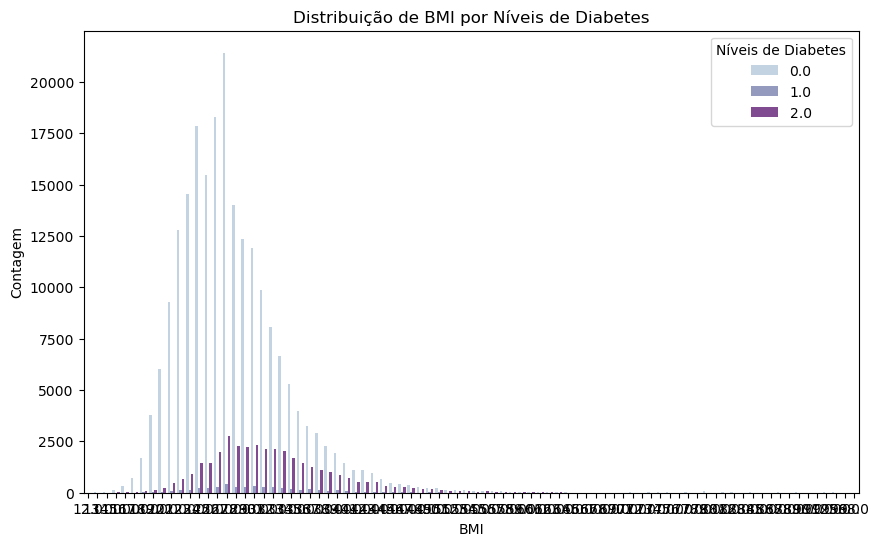

In [10]:
# contagem de BMI por nível de Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Distribuição de BMI por Níveis de Diabetes')
plt.xlabel('BMI')
plt.ylabel('Contagem')
plt.legend(title='Níveis de Diabetes')
plt.show()

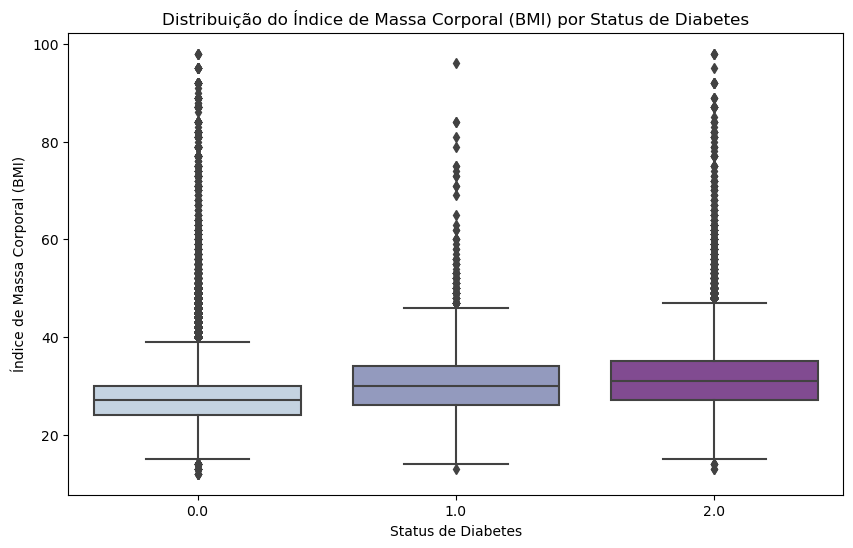

Estatística Kruskal-Wallis: 14130.749996530507, p-valor: 0.0
Existe uma diferença significativa na média de BMI entre os grupos de diabetes.


In [11]:
# distribuição do Índice de Massa Corporal (BMI) e Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=db, palette='BuPu')
plt.title('Distribuição do Índice de Massa Corporal (BMI) por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('Índice de Massa Corporal (BMI)')
plt.show()

# comparação da média de BMI entre os grupos de diabetes usando teste de Kruskal-Wallis
groups = [db[db['Diabetes_012'] == 0]['BMI'], db[db['Diabetes_012'] == 1]['BMI'], db[db['Diabetes_012'] == 2]['BMI']]
statistic, p_value = kruskal(*groups)
print(f"Estatística Kruskal-Wallis: {statistic}, p-valor: {p_value}")

if p_value < 0.05:
  print("Existe uma diferença significativa na média de BMI entre os grupos de diabetes.")
else:
  print("Não existe uma diferença significativa na média de BMI entre os grupos de diabetes.")



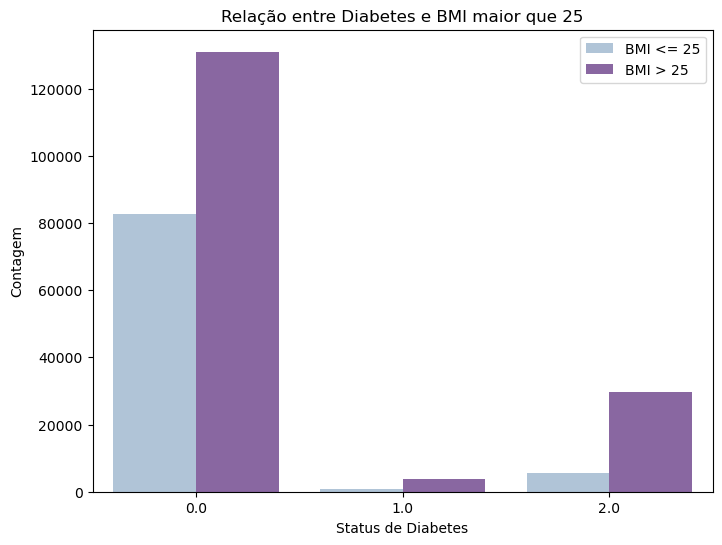

In [12]:
# gráfico de barras para visualizar a relação
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='BMI_maior_25', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e BMI maior que 25')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(['BMI <= 25', 'BMI > 25'])
plt.show()

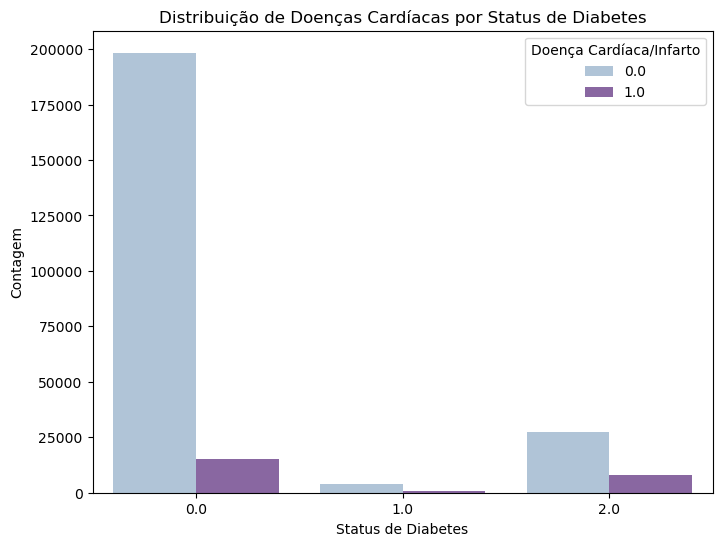

In [13]:
# contagem de casos de diabetes e doenças cardíacas
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HeartDiseaseorAttack', data=db, palette='BuPu')
plt.title('Distribuição de Doenças Cardíacas por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca/Infarto')
plt.show()

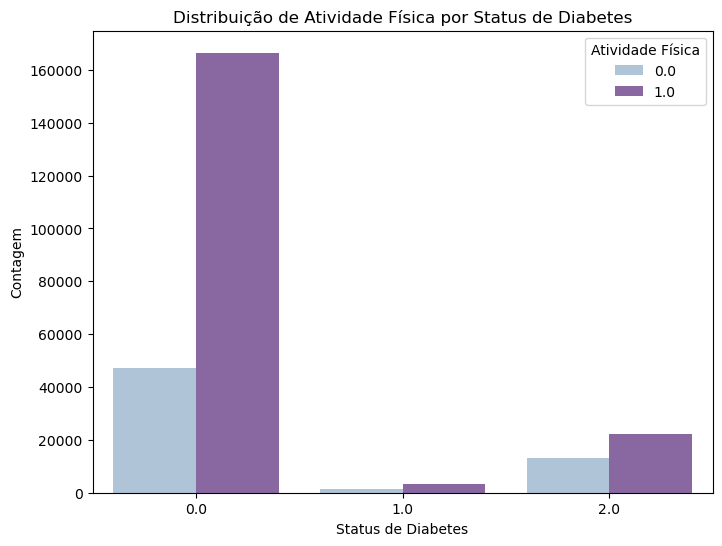

In [14]:
# contagem de casos de diabetes por nível de atividade física
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=db, palette='BuPu')
plt.title('Distribuição de Atividade Física por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Atividade Física')
plt.show()

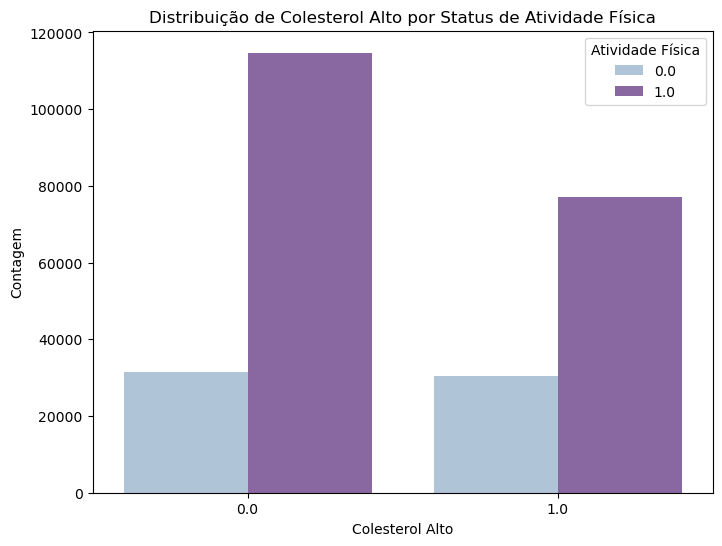

In [15]:
# contagem de casos de colesterol alto por nível de atividade física
plt.figure(figsize=(8, 6))
sns.countplot(x='HighChol', hue='PhysActivity', data=db, palette='BuPu')
plt.title('Distribuição de Colesterol Alto por Status de Atividade Física')
plt.xlabel('Colesterol Alto')
plt.ylabel('Contagem')
plt.legend(title='Atividade Física')
plt.show()


In [16]:
# correlação entre Atividade Física, Diabetes e Colesterol Alto
correlation = db[['PhysActivity', 'Diabetes_012', 'HighChol']].corr(method='spearman')
print(correlation)

              PhysActivity  Diabetes_012  HighChol
PhysActivity      1.000000     -0.121988 -0.078046
Diabetes_012     -0.121988      1.000000  0.210668
HighChol         -0.078046      0.210668  1.000000


In [17]:
# tabela de contingência entre diabetes e consumo excessivo de álcool
contingency_table = pd.crosstab(db['Diabetes_012'], db['HvyAlcoholConsump'])
print(contingency_table)

HvyAlcoholConsump     0.0    1.0
Diabetes_012                    
0.0                200487  13216
1.0                  4423    208
2.0                 34514    832


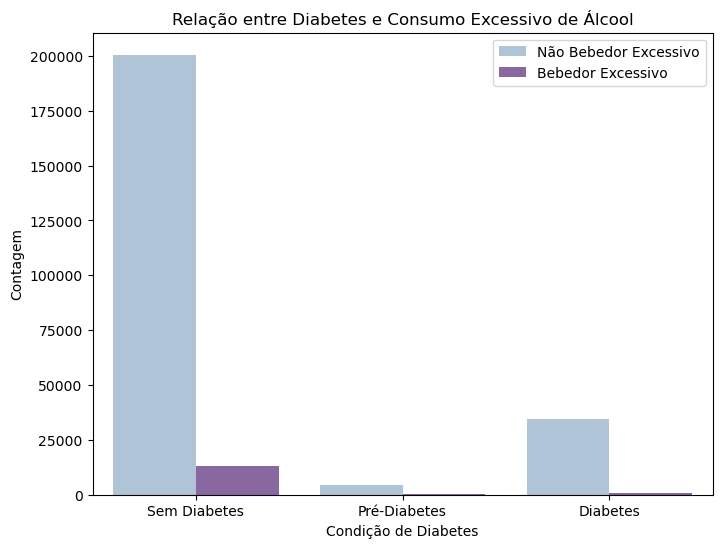

In [18]:
# gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HvyAlcoholConsump', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Consumo Excessivo de Álcool')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Contagem')
plt.xticks([0.0, 1.0, 2.0], ['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'], rotation=0)
plt.legend(['Não Bebedor Excessivo', 'Bebedor Excessivo'])
plt.show()


In [19]:
# estatísticas descritivas das variáveis MentHlth, PhysHlth e Diabetes_012
print(db[['MentHlth', 'PhysHlth', 'Diabetes_012']].describe())

            MentHlth       PhysHlth   Diabetes_012
count  253680.000000  253680.000000  253680.000000
mean        3.184772       4.242081       0.296921
std         7.412847       8.717951       0.698160
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         2.000000       3.000000       0.000000
max        30.000000      30.000000       2.000000


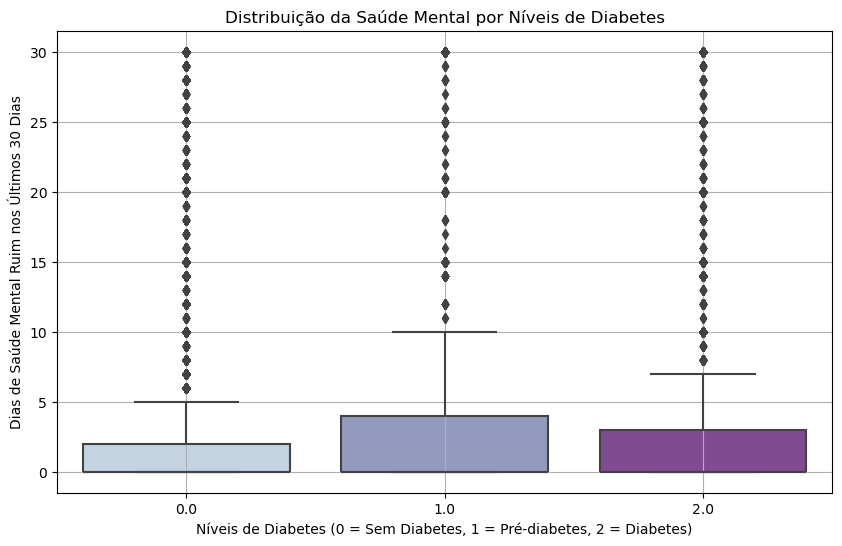

In [20]:
# boxplot de Saúde Mental por níveis de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='MentHlth', data=db, palette='BuPu')
plt.title('Distribuição da Saúde Mental por Níveis de Diabetes')
plt.xlabel('Níveis de Diabetes (0 = Sem Diabetes, 1 = Pré-diabetes, 2 = Diabetes)')
plt.ylabel('Dias de Saúde Mental Ruim nos Últimos 30 Dias')
plt.grid(True)
plt.show()

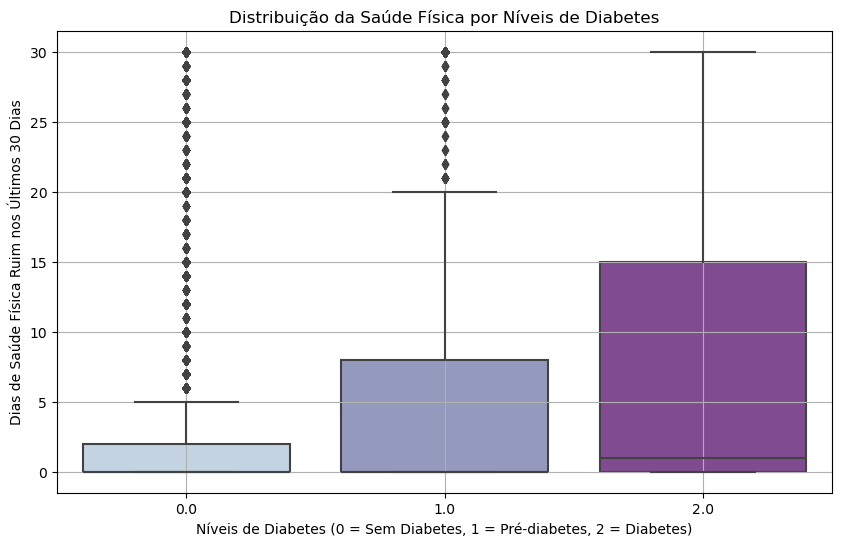

In [21]:
# boxplot de Saúde Física por níveis de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='PhysHlth', data=db, palette='BuPu')
plt.title('Distribuição da Saúde Física por Níveis de Diabetes')
plt.xlabel('Níveis de Diabetes (0 = Sem Diabetes, 1 = Pré-diabetes, 2 = Diabetes)')
plt.ylabel('Dias de Saúde Física Ruim nos Últimos 30 Dias')
plt.grid(True)
plt.show()

In [22]:
# teste de hipótese
# separar os dados em dois grupos: com diabetes e sem diabetes
grupo_com_diabetes = db[db['Diabetes_012'] == 2]['BMI']
grupo_sem_diabetes = db[db['Diabetes_012'] == 0]['BMI']

# realizar o teste t para comparar as médias dos dois grupos
t_statistic, p_value = stats.ttest_ind(grupo_com_diabetes, grupo_sem_diabetes)

# resultados do teste
print("Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

# resultados com o nível de significância
alpha = 0.05
if p_value < alpha:
  print("A diferença na média do BMI entre os grupos é estatisticamente significativa.")
else:
  print("A diferença na média do BMI entre os grupos não é estatisticamente significativa.")

Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:
Estatística t: 113.81382298039709
Valor p: 0.0
A diferença na média do BMI entre os grupos é estatisticamente significativa.


In [23]:
# correlação entre Saúde Mental, Saúde Física e Diabetes
correlation_matrix = db[['MentHlth', 'PhysHlth', 'Diabetes_012']].corr()
print("\nMatriz de Correlação entre Saúde Mental, Física e Diabetes:")
print(correlation_matrix)


Matriz de Correlação entre Saúde Mental, Física e Diabetes:
              MentHlth  PhysHlth  Diabetes_012
MentHlth      1.000000  0.353619      0.073507
PhysHlth      0.353619  1.000000      0.176287
Diabetes_012  0.073507  0.176287      1.000000


In [24]:
# Teste de Hipótese: Kruskal-Wallis para verificar diferença nos níveis de Saúde Mental e Física entre grupos de Diabetes
stat_menthlth, p_menthlth = kruskal(db['MentHlth'][db['Diabetes_012'] == 0],
                                    db['MentHlth'][db['Diabetes_012'] == 1],
                                    db['MentHlth'][db['Diabetes_012'] == 2])

stat_physhlth, p_physhlth = kruskal(db['PhysHlth'][db['Diabetes_012'] == 0],
                                    db['PhysHlth'][db['Diabetes_012'] == 1],
                                    db['PhysHlth'][db['Diabetes_012'] == 2])

# Resultados do teste Kruskal-Wallis
print(f"\nKruskal-Wallis Teste para Saúde Mental: Estatística = {stat_menthlth:.2f}, p-valor = {p_menthlth:.4f}")
print(f"Kruskal-Wallis Teste para Saúde Física: Estatística = {stat_physhlth:.2f}, p-valor = {p_physhlth:.4f}")


Kruskal-Wallis Teste para Saúde Mental: Estatística = 528.91, p-valor = 0.0000
Kruskal-Wallis Teste para Saúde Física: Estatística = 6661.88, p-valor = 0.0000


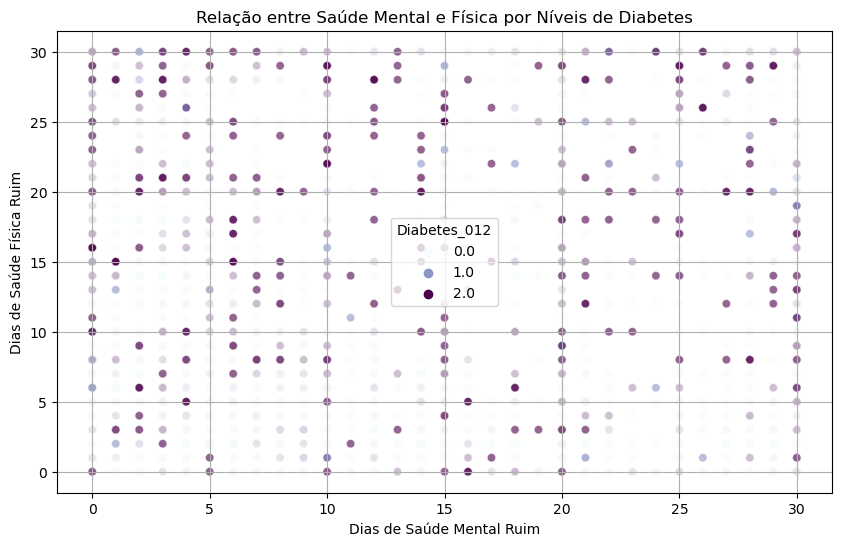

In [25]:
# gráfico de dispersão Saúde Mental x Saúde Física colorido por Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MentHlth', y='PhysHlth', hue='Diabetes_012', data=db, palette='BuPu', alpha=0.6)
plt.title('Relação entre Saúde Mental e Física por Níveis de Diabetes')
plt.xlabel('Dias de Saúde Mental Ruim')
plt.ylabel('Dias de Saúde Física Ruim')
plt.grid(True)
plt.show()

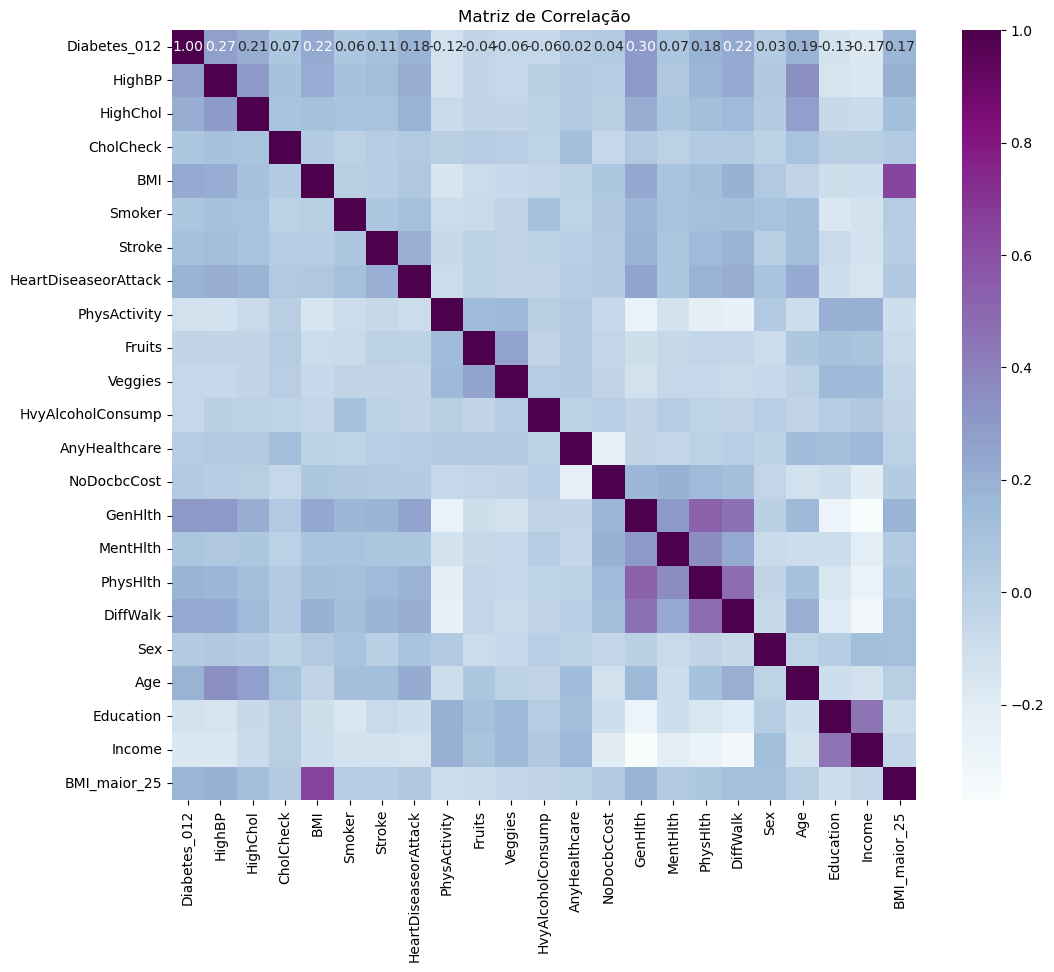

In [26]:
# matriz de correlação
correlation_matrix = db.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

C:\Users\livia\AppData\Local\Temp\ipykernel_55708\172870177.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(db['Age'], kde=True, palette='BuPu')
C:\Users\livia\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


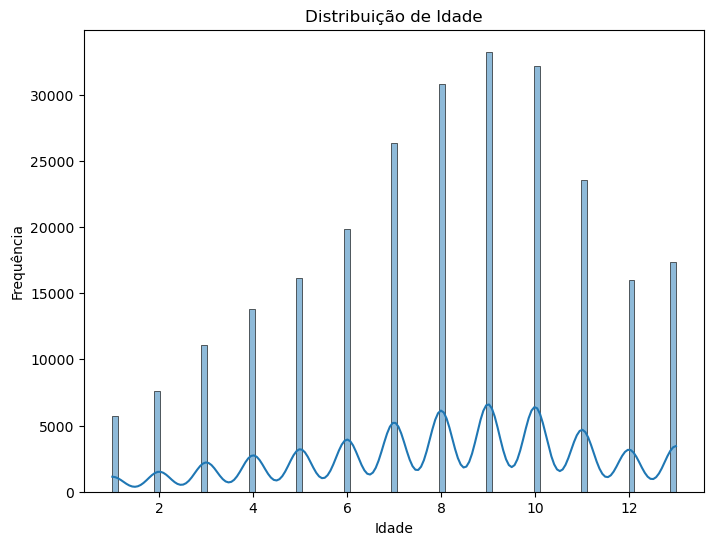

In [27]:
# histograma para a variável Age, para visualizar a distribuição etária.
plt.figure(figsize=(8, 6))
sns.histplot(db['Age'], kde=True, palette='BuPu')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

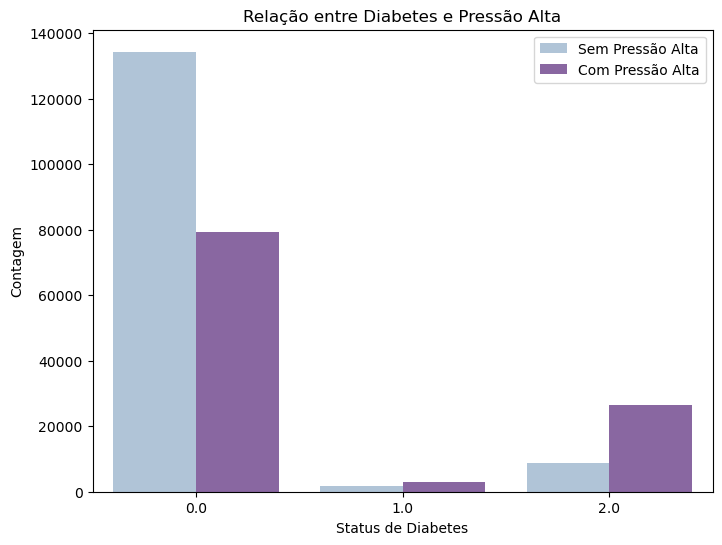

In [28]:
# gráfico de barras para visualizar a relação entre HighBP e Diabetes_012
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HighBP', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Pressão Alta')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(['Sem Pressão Alta', 'Com Pressão Alta'])
plt.show()

In [29]:
# heatmap de correlação entre as variáveis contínuas, como BMI, Age, PhysHlth, etc.continuous_vars = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'GenHlth']
correlation_matrix_continuous = db[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_continuous, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis Contínuas')
plt.show()

NameError: name 'continuous_vars' is not defined

In [ ]:
# comparar a prevalência de diabetes por faixa etária
diabetes_por_faixa_etaria = db.groupby('Age')['Diabetes_012'].value_counts(normalize=True) * 100
print(diabetes_por_faixa_etaria)

In [ ]:
# visualizar a prevalência de diabetes por faixa etária
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', hue='Age', data=db, palette='BuPu')
plt.title('Prevalência de Diabetes por Faixa Etária')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Faixa Etária')
plt.show()

In [ ]:
# tabela de contingência entre Education e Diabetes_012
contingency_table_education_diabetes = pd.crosstab(db['Education'], db['Diabetes_012'])

# teste qui-quadrado para verificar a associação entre Education e Diabetes_012
chi2_education_diabetes, p_education_diabetes, dof_education_diabetes, expected_education_diabetes = chi2_contingency(
    contingency_table_education_diabetes
)

print(
    f"Chi2: {chi2_education_diabetes}, p-valor: {p_education_diabetes}"
)

alpha = 0.05
if p_education_diabetes < alpha:
    print(
        "Há uma associação significativa entre nível de educação e diabetes."
    )
else:
    print(
        "Não há uma associação significativa entre nível de educação e diabetes."
    )

In [ ]:
# gráfico de barras para visualizar a relação entre Sexo e Diabetes_012
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='Sex', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Sexo')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(['Masculino', 'Feminino'])
plt.show()

In [ ]:
# gráfico de barras para visualizar a relação entre Nível de Educação e Diabetes_012
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_012', hue='Education', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Nível de Educação')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Nível de Educação')
plt.show()

In [ ]:
# gráfico de barras para visualizar a relação entre Renda e Diabetes_012
plt.figure(figsize=(12, 6))
sns.countplot(x='Diabetes_012', hue='Income', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Renda')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Renda')
plt.show()


In [ ]:
# variáveis que vamos usar para o PCA
X = db[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

# padronização dos dados (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# aplicar o PCA e manter todas as componentes principais
pca = PCA()
pca.fit(X_scaled)

# explicar a variância acumulada pelas componentes principais
explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='orchid')
plt.title('Variância Explicada Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
print(X_pca_2)

In [ ]:
# tabela de contingência entre AnyHealthcare e Diabetes_012
contingency_table_healthcare_diabetes = pd.crosstab(db['AnyHealthcare'], db['Diabetes_012'])

# teste qui-quadrado para AnyHealthcare e Diabetes_012
chi2_healthcare_diabetes, p_healthcare_diabetes, dof_healthcare_diabetes, expected_healthcare_diabetes = chi2_contingency(
    contingency_table_healthcare_diabetes)
print(f"Chi2 (AnyHealthcare vs Diabetes_012): {chi2_healthcare_diabetes}, p-valor: {p_healthcare_diabetes}")

# tabela de contingência entre NoDocbcCost e Diabetes_012
contingency_table_nodocbccost_diabetes = pd.crosstab(db['NoDocbcCost'], db['Diabetes_012'])

# teste qui-quadrado para NoDocbcCost e Diabetes_012
chi2_nodocbccost_diabetes, p_nodocbccost_diabetes, dof_nodocbccost_diabetes, expected_nodocbccost_diabetes = chi2_contingency(
    contingency_table_nodocbccost_diabetes)
print(f"Chi2 (NoDocbcCost vs Diabetes_012): {chi2_nodocbccost_diabetes}, p-valor: {p_nodocbccost_diabetes}")


In [ ]:
# gráfico de barras para visualizar a prevalência de diabetes por acesso à saúde
plt.figure(figsize=(10, 6))
sns.countplot(x='AnyHealthcare', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Prevalência de Diabetes por Acesso à Saúde')
plt.xlabel('Acesso à Saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Status de Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

In [ ]:
# gráfico de barras para visualizar a prevalência de diabetes por custo de saúde
plt.figure(figsize=(10, 6))
sns.countplot(x='NoDocbcCost', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Prevalência de Diabetes por Custo de Saúde')
plt.xlabel('Custo de Saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Status de Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

In [ ]:
# analisar a relação entre acesso à saúde e outros fatores de risco para diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x='AnyHealthcare', y='BMI', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Relação entre Acesso à Saúde, BMI e Diabetes')
plt.xlabel('Acesso à Saúde (0: Não, 1: Sim)')
plt.ylabel('BMI')
plt.show()

In [ ]:
# gráfico de barras comparando as variáveis categóricas com a presença de diabetes
variables = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Diabetes_012', hue=var, data=db, palette='BuPu')
    plt.title(f'Distribuição de {var} por Status de Diabetes')
    plt.xlabel('Status de Diabetes')
    plt.ylabel('Contagem')
    plt.legend(title=var)
    plt.show()

In [ ]:
# análise da Relação entre Renda (Income) e Diabetes:

contingency_table_income_diabetes = pd.crosstab(db['Income'], db['Diabetes_012'])

# teste qui-quadrado para verificar a associação entre Income e Diabetes_012
chi2_income_diabetes, p_income_diabetes, dof_income_diabetes, expected_income_diabetes = chi2_contingency(
    contingency_table_income_diabetes
)
print(
    f"Chi2: {chi2_income_diabetes}, p-valor: {p_income_diabetes}"
)

alpha = 0.05
if p_income_diabetes < alpha:
    print(
        "Há uma associação significativa entre nível de renda e diabetes."
    )
else:
    print(
        "Não há uma associação significativa entre nível de renda e diabetes."
    )

In [ ]:
# Boxplot para visualizar a distribuição de BMI por nível de renda e diabetes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income', y='BMI', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Distribuição de BMI por Nível de Renda e Diabetes')
plt.xlabel('Nível de Renda')
plt.ylabel('BMI')
plt.legend(title='Diabetes')
plt.show()

In [ ]:
# tabela de contingência entre Income e Education
contingency_table_income_education = pd.crosstab(db['Income'], db['Education'])

# teste qui-quadrado para verificar a associação entre Income e Education
chi2_income_education, p_income_education, dof_income_education, expected_income_education = chi2_contingency(
    contingency_table_income_education
)

print(
    f"Chi2: {chi2_income_education}, p-valor: {p_income_education}"
)

alpha = 0.05
if p_income_education < alpha:
    print(
        "Há uma associação significativa entre renda e nível de educação."
    )
else:
    print(
        "Não há uma associação significativa entre renda e nível de educação."
    )


In [ ]:
# gráfico de barras para visualizar a relação entre Renda Familiar e Nível de Educação
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Income', data=db, palette='BuPu')
plt.title('Relação entre Renda e Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.legend(title='Renda')
plt.show()

In [ ]:
# tabela de contingência entre Income e AnyHealthcare
contingency_table_income_healthcare = pd.crosstab(db['Income'], db['AnyHealthcare'])

# teste qui-quadrado para verificar a associação entre Income e AnyHealthcare
chi2_income_healthcare, p_income_healthcare, dof_income_healthcare, expected_income_healthcare = chi2_contingency(
    contingency_table_income_healthcare
)

print(
    f"Chi2: {chi2_income_healthcare}, p-valor: {p_income_healthcare}"
)

alpha = 0.05
if p_income_healthcare < alpha:
    print(
        "Há uma associação significativa entre renda e acesso à saúde."
    )
else:
    print(
        "Não há uma associação significativa entre renda e acesso à saúde."
    )

In [ ]:
# gráfico de barras para visualizar a relação entre Renda Familiar e Acesso à saúde
plt.figure(figsize=(12, 6))
sns.countplot(x='AnyHealthcare', hue='Income', data=db, palette='BuPu')
plt.title('Relação entre Renda Familiar e Acesso à saúde')
plt.xlabel('Acesso à saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Renda Familiar')
plt.show()

In [ ]:
# tabela de contingência entre Education e AnyHealthcare
contingency_table_education_healthcare = pd.crosstab(db['Education'], db['AnyHealthcare'])

# teste qui-quadrado para verificar a associação entre Education e AnyHealthcare
chi2_education_healthcare, p_education_healthcare, dof_education_healthcare, expected_education_healthcare = chi2_contingency(
    contingency_table_education_healthcare
)

print(
    f"Chi2: {chi2_education_healthcare}, p-valor: {p_education_healthcare}"
)

alpha = 0.05
if p_education_healthcare < alpha:
    print(
        "Há uma associação significativa entre nível de educação e acesso à saúde."
    )
else:
    print(
        "Não há uma associação significativa entre nível de educação e acesso à saúde."
    )

In [ ]:
# gráfico de barras para visualizar a relação entre Nível de Educação e Acesso à saúde
plt.figure(figsize=(12, 6))
sns.countplot(x='AnyHealthcare', hue='Education', data=db, palette='BuPu')
plt.title('Relação entre Nível de Educação e Acesso à saúde')
plt.xlabel('Acesso à saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Nível de Educação')
plt.show()